In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [13]:
df = pd.read_hdf("../../data/offset_stat_129.h5", "df")
df0 = pd.read_hdf("../../data/offset_stat_129.h5", "df1")

In [15]:
df = pd.concat([df, df0], axis=1)

In [16]:
R200_offsets = [key for key in df.keys() if "_R200" in key]

In [18]:
offsets = df.keys() - R200_offsets

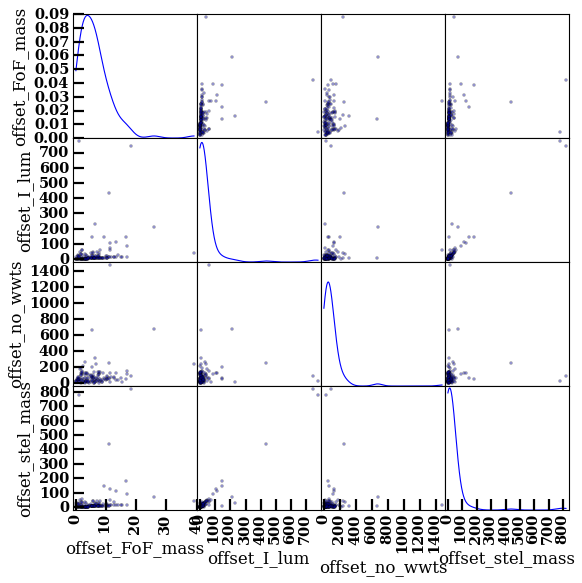

In [19]:
axArray = scatter_matrix(df[offsets], diagonal='kde', alpha=0.3,
                        figsize=(8, 8))

for axTemp in axArray:
    for ax in axTemp: 
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]): 
            item.set_fontsize(15)
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(13)

In [20]:
import seaborn as sns
sns.set_style("white")

In [25]:
df.describe()

,offset_I_lum,offset_R200_I_lum,offset_FoF_mass,offset_R200_FoF_mass,offset_stel_mass,offset_R200_stel_mass,offset_no_wwts,offset_R200_no_wwts
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,37.281424,0.107912,6.244648,0.015942,33.074001,0.092624,93.588492,0.249271
std,104.835767,0.319810,5.366485,0.014556,106.514465,0.323545,155.389777,0.427926
min,0.027215,0.000043,0.019764,0.000039,0.027215,0.000043,1.752930,0.003495
25%,4.118358,0.011613,2.488282,0.005864,4.089556,0.011364,27.584135,0.063680
50%,9.941563,0.022478,5.438129,0.013537,8.891282,0.021102,58.804352,0.141601
75%,22.080221,0.062774,8.084752,0.020460,21.153036,0.050681,107.548730,0.293187
max,775.495415,2.631515,39.114404,0.095803,818.878445,2.897078,1475.248483,3.673592


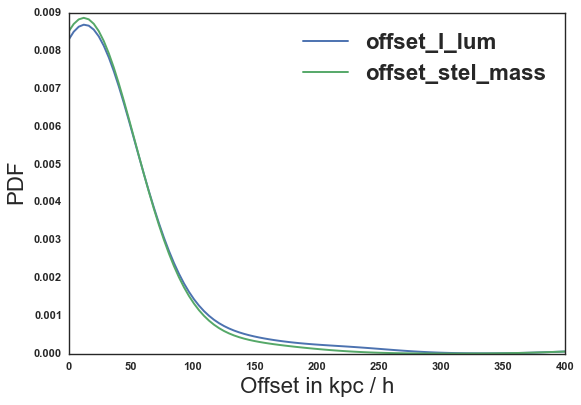

In [30]:
for k in ["offset_I_lum", "offset_stel_mass"]:
    sns.kdeplot(df[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
plt.legend(loc='best', frameon=False, fontsize=20)

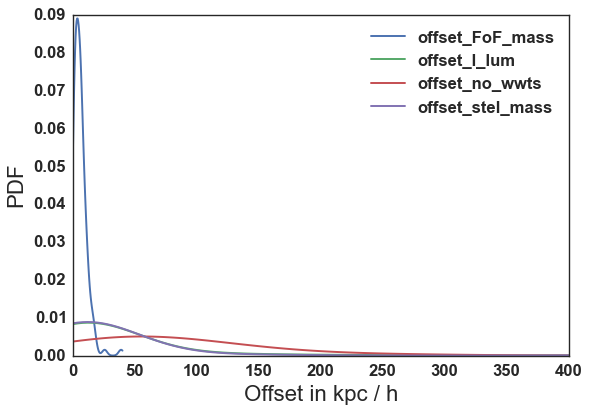

In [22]:
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in offsets:
    sns.kdeplot(df[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
plt.legend(loc='best', fontsize=15)
    


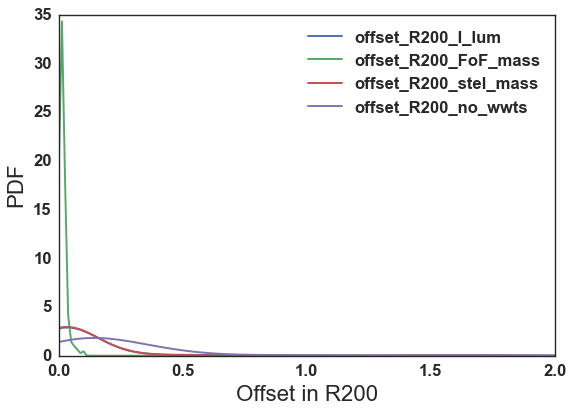

In [24]:
plt.xlabel("Offset in R200", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in R200_offsets:
    sns.kdeplot(df[k], clip=(0, 2))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    
plt.legend(loc='best', fontsize=15)